# Lab 3: Motion of falling objects

**Goal:** Introduce a method for obtaining numerical solutions to
  Newton's equations of motion and discuss the qualitative and
  quantitative behavior of bodies falling near Earth's surface.



## 1-D motion

- Start with one dimensional motion (vertical). The equations of
  motion are
\begin{equation*}
v(t) = \frac{dz(t)}{dt}
\end{equation*}
and
\begin{equation*}
a(t) = \frac{dv(t)}{dt}
\end{equation*}
where 
\begin{equation*}
a(t) = \frac{1}{m}F(z,v,t)
\end{equation*}
- The description of motion requires the  solution of the two
  coupled first-order differential equations.  One could combine to
  obtain a second-order differential equation for position, i.e., 
\begin{equation*}
\frac{d z^2(t)}{dt^2} = \frac{F}{m}
\end{equation*}

- In the absence of air resistance, all objects have the same
  acceleration at the same point near the Earth's surface.  We call
  this ``free fall''.
- The acceleration of the freely falling object is denoted as $g
  \approx 9.8$ m/s$^2$.
- Adopt a coordinate system  with the positive direction down so
  that $a = +g$.  The solution to the second-order ODE (by
  integration) is
\begin{equation*}
v(t) = v_0 + gt
\end{equation*}
and
\begin{equation*}
z(t) = z_0 + v_0t + \frac{1}{2}gt^2
\end{equation*}
where $z_0$ and $v_0$ are the initial position and velocity of the
object.
- In general the force due to Earth on an object of mass $m$ is
\begin{equation*}
F = \frac{GMm}{(R+z)^2}
\end{equation*}
where $z$ is measured from the Earth's surface, $R$ is Earth's radius,
$G$ is the gravitational constant, $M$ is Earth's mass, and $g = GM/R^2$.

- Now consider the effects of air resistance. It can be shown that
  air resistance is a force that is proportional to the square of
  the velocity, and it acts in a direction opposite to the velocity
  vector:
\begin{equation*}
{F}_{d} =  \frac{1}{2} C_d \rho A v^2 = k v^2
\end{equation*}
where $k = \frac{1}{2}C_d \rho A$.
- Here $C_d$ is the drag coefficient that is dependent on the
  shape of the projectile (i.e., $0<C_d<1$), $A$ is the
  cross-sectional area of the projectile, and $\rho$ is the density of
  air (or density of fluid that the projectile is moving through).
- For vertical motion (drag acts upward, or in the negative direction)
\begin{equation*}
 F = F_g - F_{d} = mg - F_{d}
\end{equation*}

- Since $F_{d}(v)$ increases as $v$ increases, there is a
  limiting or *terminal* speed at which $F_g = F_d$.  The terminal
  speed is
\begin{equation*}
v_t = \left ( \frac{mg}{k}\right)^{1/2}
\end{equation*}

- The net force on the falling object is
\begin{equation*}
F = mg - F_d = mg  - k v_t^2 \left (\frac{v^2}{v_t^2} \right) =  mg
\left(1-  \frac{v^2}{v_t^2} \right)
\end{equation*}
- For a pebble of radius 0.01 m, $k$ is found empirically to be $k
  \approx 10^{-4}$ kg/m.  The terminal speed is about 30 m/s.
  Terminal speed is achieved in about 3 seconds or in a vertical fall
  of about 50 m.
  
- Solve as coupled first-order differential equations with Euler algorithm.

\begin{equation*}
t^n = t^0 + n \Delta t
\end{equation*}
where superscript $n$ is the time step index, or $t^n$ is the $n$th
step.

\begin{equation*}
v^{n+1} = v^n + a^n \Delta t
\end{equation*}
and
\begin{equation*}
z^{n+1} = z^n + v^n \Delta t
\end{equation*}
- Note that $v^{n+1}$ is determined by $a^n$ at the *beginning* of the interval.  Similarly, $z^{n+1}$ is determined by $v^{n}$ at the *beginning* of the interval.



### Exercise 1: Free fall

1. Write a Python program to implement the Euler method for the motion of a freely falling object.
2. Use your program to determine the time-dependence of the velocity and position of a freely falling object near the Earth's surface. Assume the initial values $z=0$ m, *height* = 10 m, and $v=0$ (m/s).  The parameter *height* is the initial distance of the Earth's surface from the origin.  Note that $+z$ is in the downward direction.  What is a suitable value of $\Delta t$?  Compare your output with the exact result.
3. Plot $z(t)$ and $v(t)$.
4. Now add air resistance. The table below shows the vertical fall of a styrofoam ball of mass 0.254 gm and a radius of 2.54 cm.  Determine the value of the terminal velocity which yields the best agreement between the computed values of $z(t)$ and the experimental values.

|t(s)| position (m)|
|----------:|-----------:|
|-0.132| 0.0|
| 0.0 | 0.075 |
| 0.1 | 0.260 |
| 0.2 | 0.525 |
| 0.3 | 0.870 | 
| 0.4 | 1.27 |
| 0.5 | 1.73 |
| 0.6 | 2.23 |
| 0.7 | 2.77 |
| 0.8 | 3.35 |



NameError: ignored

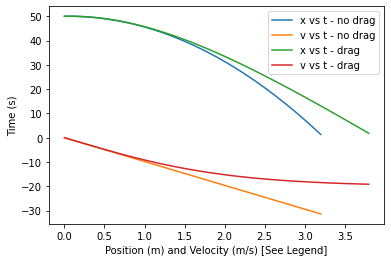

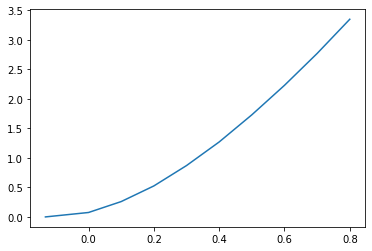

In [7]:
# 1-D free fall motion near the Earth's surface.  
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 #m/s^2

def euler_no_drag(x0,v0,dt):  #euler free fall with no drag.
    #x0 is initial position
    #v0 is the initial velocity
    #dt is the time step
    v = []           #initialize an array for the velocity output
    x = []           #initialize an array for the position output
    t = 0.0          #initial time
    time = []        #initialize an array for the time output
    while x0 >= 0:    #run until object reaches the ground, watch out for infinite loops!
        time.append(t)
        v.append(v0)
        x.append(x0)
        vp = v0 - g*dt             #velocity update        
        xp = x0 + v0*dt            #position update  
        v0 = vp                    #update the velocity, v^n = v^n+1
        x0 = xp                    #update the position, x^n = x^n+1
        t = t+dt                   #update time
    return x,v,time

def euler_drag(x0,v0,dt,v_t):  #euler free fall with drag.
    #x0 is initial position
    #v0 is the initial velocity
    #t0 is the initial time
    #dt is the time step
    #v_t is the terminal velocity
    v = []           #initialize an array for the velocity output
    x = []           #initialize an array for the position output
    t = 0            #initial time
    time = []        #initialize an array for the time output
    while x0 >= 0:    #run until object reaches the ground, watch out for infinite loops!
        time.append(t)
        v.append(v0)
        x.append(x0)
        if v0 < 0:
          vp = v0 - g*dt + (g/(v_t**2))*(v0**2)*dt
        else:
          vp = v0 - g*dt - (g/(v_t**2))*(v0**2)*dt
        xp = x0 + v0*dt            #position update  
        v0 = vp                    #update the velocity, v^n = v^n+1
        x0 = xp                    #update the position, x^n = x^n+1
        t = t+dt                   #update time
    return x,v,time

#This is just for fitting with the data set, I prefer gravity as a negative values
def euler_drag_down_pos(x0,v0,t0,h,dt,v_t):  #euler free fall with drag.
    #x0 is initial position
    #v0 is the initial velocity
    #t0 is the initial time
    #h is the height
    #dt is the time step
    #v_t is the terminal velocity
    v = []           #initialize an array for the velocity output
    x = []           #initialize an array for the position output
    xp = 0.0         #n+1 value
    t = t0           #initial time
    time = []        #initialize an array for the time output
    while xp < h:    #run until object reaches the ground, watch out for infinite loops!
        time.append(t)
        v.append(v0)
        x.append(x0)
        vp = v0 + g*dt - (g/(v_t**2))*(v0**2)*dt      #velocity update
        xp = x0 + v0*dt                               #position update  
        v0 = vp                                       #update the velocity, v^n = v^n+1
        x0 = xp                                       #update the position, x^n = x^n+1
        t = t+dt                                      #update time
    return x,v,time

FF_data_no_drag = []
FF_data_drag = []

FF_data_no_drag = euler_no_drag(50,0,0.1)
#print(data)

FF_data_drag = euler_drag(50,0,0.1,20)
#print(data)

plt.plot(FF_data_no_drag[2],FF_data_no_drag[0], label='x vs t - no drag')
plt.plot(FF_data_no_drag[2],FF_data_no_drag[1], label='v vs t - no drag')
plt.plot(FF_data_drag[2],FF_data_drag[0], label='x vs t - drag')
plt.plot(FF_data_drag[2],FF_data_drag[1], label='v vs t - drag')
#plt.gca().invert_yaxis() (No need since I changes the sign of gravity, keeping for later labs)
plt.legend()
plt.xlabel("Position (m) and Velocity (m/s) [See Legend]")
plt.ylabel("Time (s)")

################################################################################
#Finding terminal velocity based on data:

#styrofoam ball
ts = [-0.132,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
zs = [0.0,0.075, 0.260, 0.525, 0.870, 1.27, 1.73, 2.23, 2.77, 3.35]
styrofoam_fit = []

styrofoam_fit = euler_drag_down_pos(0,0,-0.132,3.35,0.1,7.5)

plt.figure()
plt.plot(ts,zs, label='x vs t - data')
plt.plot(ts,vs, label='v vs t - data')
plt.plot(styrofoam_fit[2],styrofoam_fit[0], label='x vs t - fit')
plt.plot(styrofoam_fit[2],styrofoam_fit[1], label='v vs t - fit')
#plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position (m) and Velocity (m/s) [See Legend]")


#Drag_Coeff = 0.33                    #unitless
#XSec_Area = np.pi*(2.54*1/100)**2   #in m^2
#AirDensity = 1.225                  #in kg/m^3
#Mass_Styrofoam = 0.254/1000          #in kg
#F_Drag = (1/2)*Drag_Coeff*XSec_Area*AirDensity*Velocity
#Acc_Drag = F_Drag/Mass_Styrofoam


Seems to fit well around a terminal velocity of around 6.5 - 7.5 m/s

### Exercise 2: Accent and descent of a pebble

1. Compute the speed at which a pebble reaches the ground if it is dropped from a height of 50 m.  Compare with a freely falling object (no air resistance).  Assume that the terminal speed of the pebble is 30 m/s.

2. Now throw the pebble vertically upward with an initial velocity $v_0$.  The maximum height (no air resistance) reached by an object is $v_0^2/2g$, and its velocity upon return to Earth is $v_0$.  The time of ascent equals descent, and the total time in the air is $2v_0/g$. How does air resistance affect your result?  Hint: watch out for the *sign* of the velocity in the drag force. 


Final Velocity with Drag -24.65931092480341
Final Velocity w/o Drag -31.392000000000024


Text(0, 0.5, 'Time (s)')

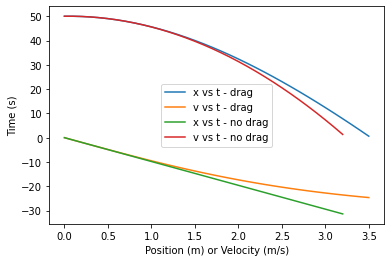

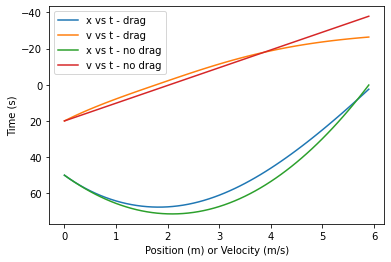

In [8]:
# script for ascent and decent
#Section 1:
P_Drag = euler_drag(50,0,0.1,30)
P_N_Drag = euler_no_drag(50,0,0.1)

plt.figure()
plt.plot(P_Drag[2],P_Drag[0], label='x vs t - drag')
plt.plot(P_Drag[2],P_Drag[1], label='v vs t - drag')
plt.plot(P_N_Drag[2],P_N_Drag[1], label='x vs t - no drag')
plt.plot(P_N_Drag[2],P_N_Drag[0], label='v vs t - no drag')
plt.legend()
plt.xlabel("Position (m) or Velocity (m/s)")
plt.ylabel("Time (s)")

print(f"Final Velocity with Drag {P_Drag[1][-1]}")
print(f"Final Velocity w/o Drag {P_N_Drag[1][-1]}")

#Section 2:
P_N_Drag2 = euler_no_drag(50,20,0.1)
P_Drag2 = euler_drag(50,20,0.1,30)

plt.figure()
plt.plot(P_Drag2[2],P_Drag2[0], label='x vs t - drag')
plt.plot(P_Drag2[2],P_Drag2[1], label='v vs t - drag')
plt.plot(P_N_Drag2[2],P_N_Drag2[0], label='x vs t - no drag')
plt.plot(P_N_Drag2[2],P_N_Drag2[1], label='v vs t - no drag')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Position (m) or Velocity (m/s)")
plt.ylabel("Time (s)")

## 2-D motion
- Newton's equations of motion for $x$ and $z$ components of
  motion are
\begin{eqnarray*}
m \frac{d v_x}{dt} &=& - F_d \cos\theta\\
m \frac{d v_z}{dt} & = & - mg - F_d \sin \theta
\end{eqnarray*}
- Since $v_x = v \cos \theta$ and $v_z = \sin \theta$, this can be
  rewritten as
\begin{eqnarray*}
 \frac{d v_x}{dt} &=& - \frac{k}{m} v (v \cos\theta) = - \frac{k}{m} v v_x\\
\frac{d v_z}{dt} & = & - g - \frac{k}{m} v (v \sin \theta)= - g - \frac{k}{m} v v_z
\end{eqnarray*}
- Note that both equations involve the magnitude of the velocity,
  $v^2 = v_x^2 + v_z^2$.  Hence, we cannot calculate the vertical
  motion without reference to the horizontal component.

  

## Exercise 3:  Two-dimensional trajectories

1. Modify your code  so that the two-dimensional trajectory of a ball moving in the air is computed.

2. First compare your results with the expected result without air resistance.  Let $\theta_0 = 15^\circ$ and $v_0$ = 15 m/s.  Vary $\theta_0$ and show that the range is maximized when $\theta_0 \approx 45^\circ$.

3. Repeat part 2, but now suppose the ball is thrown from a height $h$ at an angle $\theta_0$ above the horizontal with $v_0 = 15$ m/s.  Numerically determine the angle $\theta_0$  that maximizes range.

4. Finally, consider the effects of air resistance on the optimum range and launch angle.  Estimate the value of $k/m$ (a realistic value for a shot put is $\sim$0.001, but choose any type of ball that you like!).  It might be helpful to initially exaggerate the effects of air resistance.

At height 0 meters:
At 0.0 degrees the projectile makes it to 1.5 meters
At 10.0 degrees the projectile makes it to 8.125865474646723 meters
At 20.0 degrees the projectile makes it to 13.223840859356603 meters
At 29.999999999999996 degrees the projectile makes it to 16.714428868606532 meters
At 40.0 degrees the projectile makes it to 17.830905031221533 meters
At 50.0 degrees the projectile makes it to 17.465086932879505 meters
At 59.99999999999999 degrees the projectile makes it to 15.112740322455407 meters
At 70.0 degrees the projectile makes it to 11.118679935016386 meters
At 80.0 degrees the projectile makes it to 6.0406776759319945 meters
At 90.0 degrees the projectile makes it to 2.151651782592729e-15 meters

At height 15 meters:
At 0.0 degrees the projectile makes it to 1.5 meters
At 10.0 degrees the projectile makes it to 8.125865474646723 meters
At 20.0 degrees the projectile makes it to 13.223840859356603 meters
At 29.999999999999996 degrees the projectile makes it to 16.71442

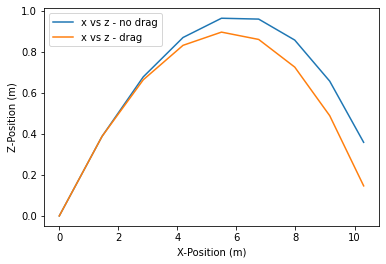

In [9]:
# 2-D motion

def euler_2D(x0,z0,v0,angle,dt,v_t,drag = 0):
    #x0 (horizontal), z0 (vertical) is initial position
    #v0 is the initial velocity
    #angle is the launch angle (between 0 and pi/2)
    #dt is the time step
    #v_t is the terminal velocity
    #drag gives the choice of including drag (anything for yes, defaults to no)
    vx = []         #initialize an array for the velocity output
    vz = []         #initialize an array for the velocity output
    x = []          #initialize an array for the horizontal-position output
    z = []          #initialize an array for the vertical-position output
    xp = 0.0        #n+1 value
    zp = 0.0        #n+1 value
    t = 0           #initial time
    time = []       #initialize an array for the time output
    vx0 = v0*np.cos(angle)
    vz0 = v0*np.sin(angle)
    while z0 >= 0:  #run until object reaches the ground, watch out for infinite loops!
        time.append(t)
        vx.append(vx0)
        vz.append(vz0)
        x.append(x0)
        z.append(z0)
        v0 = np.sqrt(vx0**2 + vz0**2)
        vxp = vx0 - ((g/(v_t**2))*v0*vx0)*dt
        #Yeah, not really efficient since this triggers every loop but... it works, ha
        if drag != 0:
          if vz0 < 0:
            vzp = vz0 - g*dt + (g/(v_t**2))*v0*vz0*dt
          else:
            vzp = vz0 - g*dt - (g/(v_t**2))*v0*vz0*dt
        else:
          vzp = vz0 - g*dt
        xp = x0 + vx0*dt              #horizontal position update
        zp = z0 + vz0*dt              #vertical position update
        vx0 = vxp                     #update the velocity, v^n = v^n+1
        vz0 = vzp
        x0 = xp                       #update the position, x^n = x^n+1
        z0 = zp                   
        t = t+dt                      #update time
    return x,z,vx,vz,time

#Problem 2:
Projectile_2D_wo_drag = euler_2D(0,0,15,15*(np.pi/180),0.1,20,0)
Projectile_2D_drag = euler_2D(0,0,15,15*(np.pi/180),0.1,20,1)

plt.figure()
plt.plot(Projectile_2D_wo_drag[0],Projectile_2D_wo_drag[1], label='x vs z - no drag')
plt.plot(Projectile_2D_drag[0],Projectile_2D_drag[1], label='x vs z - drag')
#plt.plot(Projectile_2D[4],Projectile_2D[0], label='x vs t - drag')
#plt.plot(Projectile_2D[4],Projectile_2D[1], label='z vs t - drag')
plt.legend()
plt.ylabel("Z-Position (m)")
plt.xlabel("X-Position (m)")

Angles1 = np.linspace(0,np.pi/2,10)
Range_Vals1 = np.zeros(len(Angles1))
print("At height 0 meters:")
for i in range(len(Angles1)):
  Data1 = euler_2D(0,0,15,Angles1[i],0.1,20,0)
  Range_Vals1[i] = Data1[0][-1]
  print(f"At {Angles1[i]*(180/np.pi)} degrees the projectile makes it to {Range_Vals1[i]} meters")

print()

#Problem 3:
Angles2 = np.linspace(0,np.pi/2,10)
Range_Vals2 = np.zeros(len(Angles2))
print("At height 15 meters:")
for i in range(len(Angles2)):
  Data2 = euler_2D(0,0,15,Angles2[i],0.1,20,0)
  Range_Vals2[i] = Data2[0][-1]
  print(f"At {Angles2[i]*(180/np.pi)} degrees the projectile makes it to {Range_Vals2[i]} meters")

print()

#Problem 4:
Angles3 = np.linspace(0,np.pi/2,10)
Range_Vals3 = np.zeros(len(Angles3))
print("At height 0 meters:")
v_t = 15
k_over_m = g/(v_t**2)
print(f"k over m ratio for this terminal velocity is {k_over_m}")
for i in range(len(Angles3)):
  Data3 = euler_2D(0,0,15,Angles3[i],0.1,v_t,1)
  Range_Vals3[i] = Data3[0][-1]
  print(f"At {Angles3[i]*(180/np.pi)} degrees the projectile makes it to {Range_Vals3[i]} meters")
